In [1]:
import pandas as pd


In [2]:
farm_branches = pd.read_csv('/home/cleyton/Documentos/ProjetosGit/msc_thesis_naea_ufpa/2_DataProcessing/csv_result/farm_branches_amazon.csv', usecols=['City', 'Organization', 'Name', 'State'])
rtrs_brazil = pd.read_csv('/home/cleyton/Documentos/ProjetosGit/msc_thesis_naea_ufpa/1_DataSource/csv_files/brazil_rtrs_sentiment_analysis_substituted.csv', usecols=['Organization', 'score_per_enterprise', 'Names', 'Year'])

In [3]:
farm_branches.head(5)

,Name,Organization,State,City
0,GGF Agro LTDA,GGF Agro,Mato Grosso,Lucas do Rio Verde
1,Cerquality Consultoria em Sustentabilidade e C...,Cerquality Consultoria em Sustentabilidade e C...,Mato Grosso,Paranatinga
2,GMS Agronegócio Ltda,GMS Agronegócio,Mato Grosso,Diamantino
3,Amaggi Exp Imp Ltda–Grupo III,Amaggi,Mato Grosso,Feliz Natal
4,Amaggi Exp Imp Ltda–Grupo III,Amaggi,Mato Grosso,Lucas do Rio Verde


In [4]:
rtrs_brazil.head(5)

,Organization,Names,Year,score_per_enterprise
0,Cataratas do Iguaçu Produtos Orgânicos,Cataratas do Iguaçu Produtos Orgânicos LTDA - ...,2022.0,-6.0
1,Fundação de Apoio à Pesquisa do Corredor de Ex...,Fundação de Apoio à Pesquisa do Corredor de Ex...,2022.0,-44.0
2,Fazenda Santa Cruz,Fazenda Santa Cruz,2023.0,-10.0
3,Serra da Pintura,Serra da Pintura,2023.0,-46.0
4,Tecnosol Consultoria Rural,Tecnosol Consultoria Rural LTDA,2022.0,-35.0


In [5]:
mapping = dict(rtrs_brazil[['Names', 'score_per_enterprise']].values)

In [6]:
farm_branches['score_per_enterprise'] = farm_branches['Name'].map(mapping)

In [7]:
farm_branches[farm_branches['score_per_enterprise'].isna()]

,Name,Organization,State,City,score_per_enterprise
213,Fazenda Lagoa do Cervo,Fazenda Lagoa do Cervo,Mato Grosso,Diamantino,NaN


In [8]:
farm_branches.dropna(inplace=True)

In [9]:
grouped_df = farm_branches.groupby(['State', 'City']).agg({'score_per_enterprise': 'mean'}).reset_index()

In [10]:
grouped_df

,State,City,score_per_enterprise
0,Amazonas,Autazes,1.000000
1,Amazonas,Lábrea,-13.333333
2,Mato Grosso,Alto Paraguai,19.000000
3,Mato Grosso,Bom Jesus do Araguaia,32.000000
4,Mato Grosso,Brasnorte,-23.500000
5,Mato Grosso,Campo Novo do Parecis,-11.483871
6,Mato Grosso,Canabrava do Norte,28.000000
7,Mato Grosso,Colíder,-16.500000
8,Mato Grosso,Comodoro,-2.750000
9,Mato Grosso,Diamantino,15.941176


In [11]:
codigos_municipios = pd.read_excel('/home/cleyton/Documentos/ProjetosGit/msc_thesis_naea_ufpa/1_DataSource/csv_files/RELATORIO_DTB_BRASIL_MUNICIPIO.xls', 
                                   header=6, 
                                   usecols=['Nome_Município', 'Código Município Completo', 'Nome_Microrregião',
                                            'Nome_Mesorregião'])

mapa_dos_conflitos = pd.read_excel('/home/cleyton/Documentos/ProjetosGit/msc_thesis_naea_ufpa/1_DataSource/dados_mapa_dos_confllitos.xlsx')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


In [12]:
codigos_municipios.dtypes

Nome_Mesorregião             object
Nome_Microrregião            object
Código Município Completo     int64
Nome_Município               object
dtype: object

In [13]:
mapa_dos_conflitos.dtypes

CD_MUN                 int64
CD_LENTE               int64
ANO                    int64
VALOR                float64
VALOR_PADRONIZADO    float64
FAIXA                  int64
TEXTO                 object
dtype: object

In [14]:
mapa_dos_conflitos = mapa_dos_conflitos[mapa_dos_conflitos['ANO'].isin([2018, 2019, 2020, 2021, 2022, 2023])]

In [15]:
mapping_city = dict(codigos_municipios[['Código Município Completo', 'Nome_Município']].values)

In [16]:
mapa_dos_conflitos['Nome_Município'] = mapa_dos_conflitos['CD_MUN'].map(mapping_city)

In [17]:
mapa_dos_conflitos.head(5)

,CD_MUN,CD_LENTE,ANO,VALOR,VALOR_PADRONIZADO,FAIXA,TEXTO,Nome_Município
7,1100015,1,2018,3.0,3.0,2,NaN,Alta Floresta D'Oeste
8,1100015,1,2019,1.0,1.0,1,NaN,Alta Floresta D'Oeste
9,1100015,1,2020,11.0,11.0,4,NaN,Alta Floresta D'Oeste
17,1100023,1,2018,4.0,4.0,2,NaN,Ariquemes
18,1100023,1,2019,6.0,6.0,2,NaN,Ariquemes


In [18]:
mapping_meso = dict(codigos_municipios[['Nome_Município', 'Nome_Mesorregião']].values)
mapa_dos_conflitos['Nome_Mesorregião'] = mapa_dos_conflitos['Nome_Município'].map(mapping_meso)

In [19]:
mapa_dos_conflitos.head(5)

,CD_MUN,CD_LENTE,ANO,VALOR,VALOR_PADRONIZADO,FAIXA,TEXTO,Nome_Município,Nome_Mesorregião
7,1100015,1,2018,3.0,3.0,2,NaN,Alta Floresta D'Oeste,Leste Rondoniense
8,1100015,1,2019,1.0,1.0,1,NaN,Alta Floresta D'Oeste,Leste Rondoniense
9,1100015,1,2020,11.0,11.0,4,NaN,Alta Floresta D'Oeste,Leste Rondoniense
17,1100023,1,2018,4.0,4.0,2,NaN,Ariquemes,Leste Rondoniense
18,1100023,1,2019,6.0,6.0,2,NaN,Ariquemes,Leste Rondoniense


In [20]:
rtrs_brazil['Year'].describe()

count     128.000000
mean     2020.625000
std         1.254912
min      2018.000000
25%      2020.000000
50%      2021.000000
75%      2022.000000
max      2023.000000
Name: Year, dtype: float64

In [21]:
city = grouped_df['City'].tolist()
mapa_dos_conflitos = mapa_dos_conflitos[mapa_dos_conflitos['Nome_Município'].isin(city)]

In [22]:
mapa_dos_conflitos.describe()

,CD_MUN,CD_LENTE,ANO,VALOR,VALOR_PADRONIZADO,FAIXA
count,9.840000e+02,984.000000,984.000000,984.000000,984.000000,984.000000
mean,4.359033e+06,4.500000,2019.000000,43.881411,7.385652,1.165650
std,1.520513e+06,2.292453,0.816912,170.530026,15.207977,1.083493
min,1.100072e+06,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,5.101902e+06,2.750000,2018.000000,0.000000,0.000000,0.000000
50%,5.105507e+06,4.500000,2019.000000,1.000000,0.732000,1.000000
75%,5.107354e+06,6.250000,2020.000000,9.775000,5.984646,2.000000
max,5.108956e+06,8.000000,2020.000000,2496.000000,120.713193,5.000000


In [23]:
print(len(mapa_dos_conflitos['Nome_Município'].unique()), len(grouped_df))

41 41


In [24]:
mapa_dos_conflitos.columns

Index(['CD_MUN', 'CD_LENTE', 'ANO', 'VALOR', 'VALOR_PADRONIZADO', 'FAIXA',
       'TEXTO', 'Nome_Município', 'Nome_Mesorregião'],
      dtype='object')

In [25]:
grouped_df.rename(columns={'City': 'Nome_Município'}, inplace=True)

In [26]:
mapa_lentes = {
    1: 'Conflitos',
    2: 'Queimadas',
    3: 'Desmatamento',
    4: 'Agrotóxicos',
    5: 'Desigualdade',
    6: 'Água',
    7: 'Mineração',
    8: 'Violência',
}
df_list = list()

for idx, name in mapa_lentes.items():
    df = mapa_dos_conflitos[mapa_dos_conflitos['CD_LENTE'] == idx]
    df = df.groupby(['Nome_Município', 'Nome_Mesorregião']).agg({'VALOR': 'mean'}).reset_index()
    df.rename(columns={'VALOR': name}, inplace=True)
    grouped_df = pd.merge(grouped_df, df[['Nome_Município', name]], on='Nome_Município', how='left')

In [27]:
grouped_df.to_csv('capitulo3_dados.csv', index = False)

In [28]:
grouped_df.columns

Index(['State', 'Nome_Município', 'score_per_enterprise', 'Conflitos',
       'Queimadas', 'Desmatamento', 'Agrotóxicos', 'Desigualdade', 'Água',
       'Mineração', 'Violência'],
      dtype='object')

In [29]:
from sklearn.preprocessing import StandardScaler

X = grouped_df.iloc[:, 3:]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df['Score'] = grouped_df['score_per_enterprise'].copy(deep=True)

In [30]:
X_scaled_df.head()

,Conflitos,Queimadas,Desmatamento,Agrotóxicos,Desigualdade,Água,Mineração,Violência,Score
0,2.194196,-0.571861,-0.348917,-0.040558,-0.963863,-0.102466,-0.395184,-2.091735,1.000000
1,1.085265,-0.571861,-0.348917,6.035396,-0.593047,5.450570,2.284751,-3.013682,-13.333333
2,-0.993981,-0.571861,-0.348917,-0.461856,0.413453,-0.547458,-0.223078,-0.869153,19.000000
3,0.253567,-0.571861,-0.348917,-0.409047,-1.175758,-0.496627,-0.493530,-0.408179,32.000000
4,1.085265,-0.571861,-0.348917,0.101439,0.413453,0.184683,-0.419770,0.293302,-23.500000


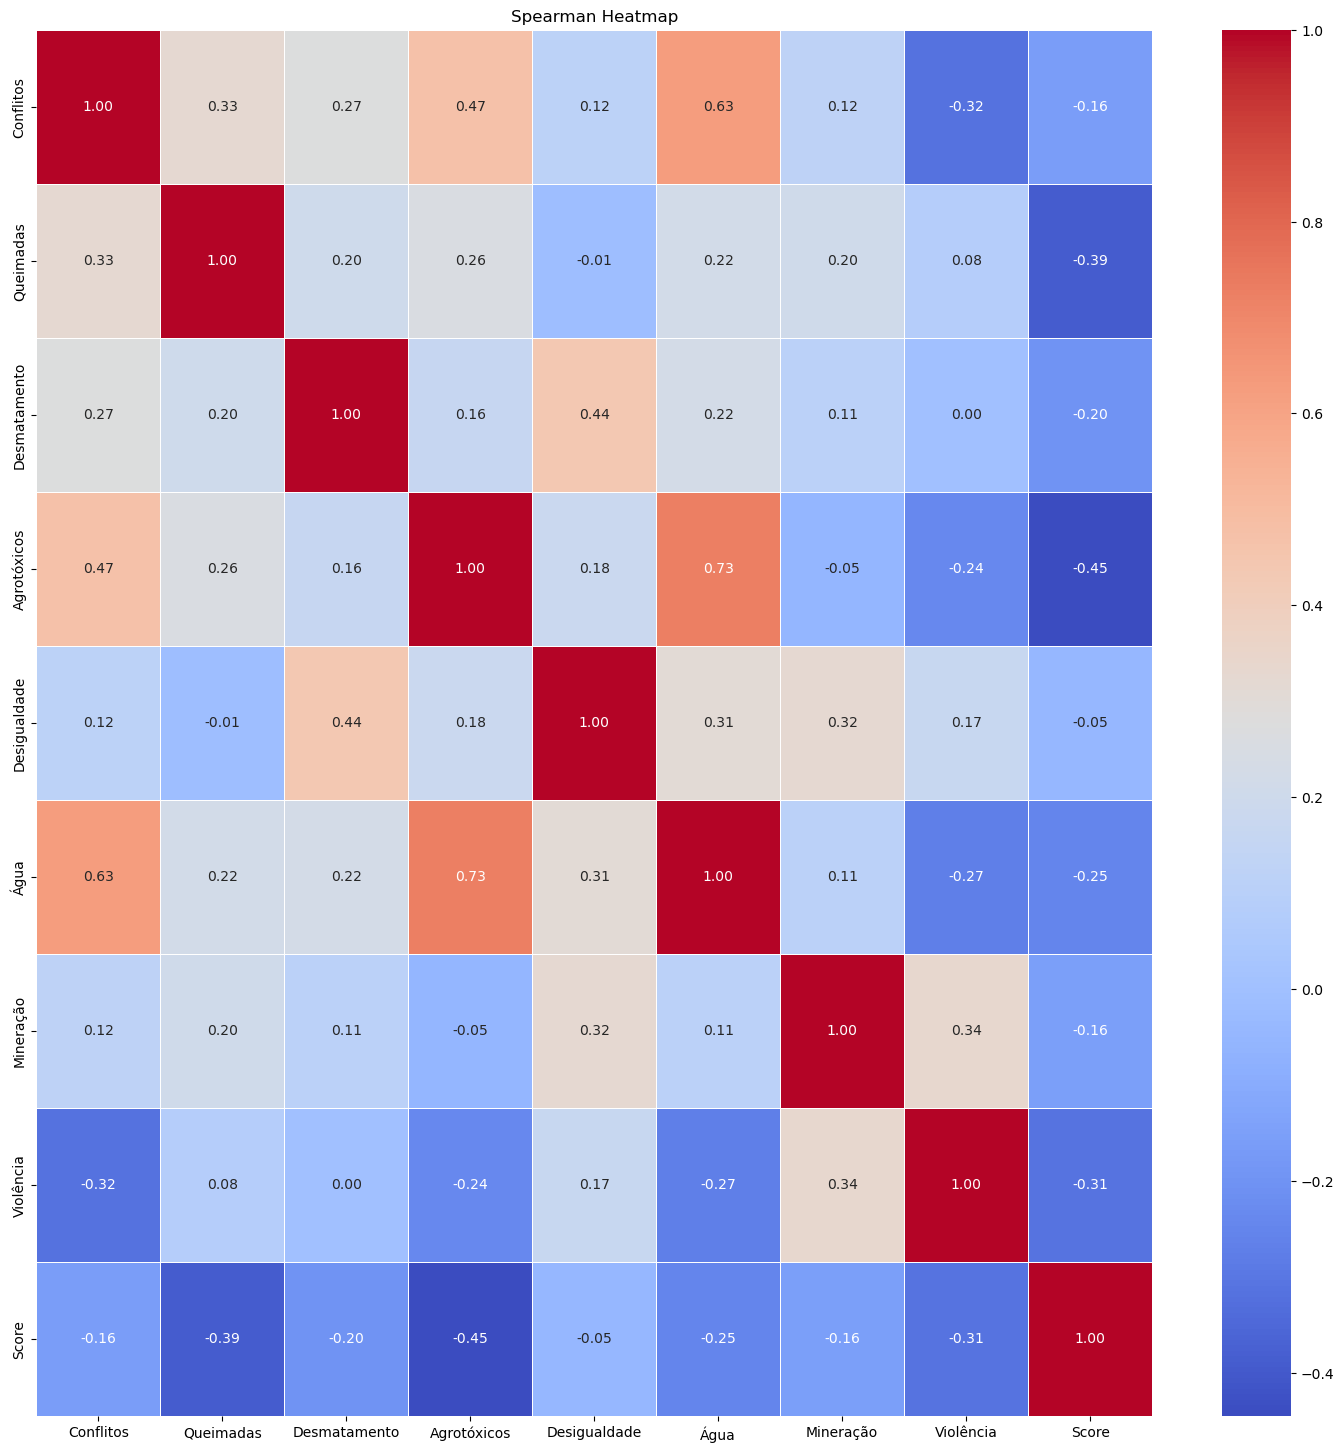

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_data =X_scaled_df.corr(method='spearman')

plt.figure(figsize=(18, 18))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Heatmap')
plt.savefig('spearman_heatmap.png', dpi=300, transparent=True)
plt.show()

In [32]:
X_scaled_df

,Conflitos,Queimadas,Desmatamento,Agrotóxicos,Desigualdade,Água,Mineração,Violência,Score
0,2.194196,-0.571861,-0.348917,-0.040558,-0.963863,-0.102466,-0.395184,-2.091735,1.000000
1,1.085265,-0.571861,-0.348917,6.035396,-0.593047,5.450570,2.284751,-3.013682,-13.333333
2,-0.993981,-0.571861,-0.348917,-0.461856,0.413453,-0.547458,-0.223078,-0.869153,19.000000
3,0.253567,-0.571861,-0.348917,-0.409047,-1.175758,-0.496627,-0.493530,-0.408179,32.000000
4,1.085265,-0.571861,-0.348917,0.101439,0.413453,0.184683,-0.419770,0.293302,-23.500000
5,0.392183,-0.026598,-0.348917,-0.445426,-0.540073,-0.413693,-0.026386,1.054911,-11.483871
6,-0.855365,0.518665,-0.348917,-0.415501,-0.910889,-0.277253,-0.468944,-0.287925,28.000000
7,-0.993981,-0.571861,-0.348917,-0.366213,0.095611,-0.742755,-0.223078,0.634022,-16.500000
8,0.114950,-0.571861,1.130972,0.099092,1.684822,0.626108,-0.346011,0.153006,-2.750000
9,-0.300899,-0.571861,-0.348917,-0.431931,1.578875,-0.393182,0.047374,0.734234,15.941176


In [65]:
import statsmodels.api as sm

y =X_scaled_df['Score']
X = X_scaled_df[['Queimadas', 'Agrotóxicos']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

In [66]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     2.589
Date:                Sat, 27 Jan 2024   Prob (F-statistic):             0.0883
Time:                        20:07:56   Log-Likelihood:                -177.03
No. Observations:                  41   AIC:                             360.1
Df Residuals:                      38   BIC:                             365.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -10.6509      2.945     -3.617      

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Suponha que X e y são suas variáveis independentes e dependentes, respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Dicionário para armazenar os modelos
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR(),
    "RandomForest": RandomForestRegressor()
}

# Treinando e avaliando cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"{name} - R2 Score: {r2_score(y_test, predictions):.2f}, MSE: {mean_squared_error(y_test, predictions):.2f}")

    # Para modelos lineares (Ridge, Lasso, ElasticNet)
    if name in ["Ridge", "Lasso", "ElasticNet"]:
        print(f"Coeficientes do Modelo {name}: {model.coef_}")

    # Para Random Forest
    elif name == "RandomForest":
        print(f"Importância das variáveis no Modelo {name}: {model.feature_importances_}")

    # Para SVR, a importância das variáveis não é diretamente acessível
    elif name == "SVR":
        print(f"SVR não fornece uma avaliação direta da importância dos coeficientes.")


Ridge - R2 Score: -0.94, MSE: 566.21
Coeficientes do Modelo Ridge: [ 0.         -2.77085718 -7.47049096 -9.55298038]
Lasso - R2 Score: -0.92, MSE: 562.67
Coeficientes do Modelo Lasso: [ 0.         -2.0711538  -6.10062452 -8.16414327]
ElasticNet - R2 Score: -0.79, MSE: 522.84
Coeficientes do Modelo ElasticNet: [ 0.         -2.0783332  -3.33954028 -4.69418504]
SVR - R2 Score: -0.65, MSE: 482.02
SVR não fornece uma avaliação direta da importância dos coeficientes.
RandomForest - R2 Score: -0.92, MSE: 561.58
Importância das variáveis no Modelo RandomForest: [0.         0.05087054 0.55091051 0.39821895]


In [36]:
X_scaled_df['Risk'] = X_scaled_df['Score'].apply(lambda x: 'Risk' if x < 0 else 'Non-Risk')

In [37]:
X_scaled_df = pd.get_dummies(X_scaled_df, columns=['Risk'], drop_first=True)
# Agora, 'Risk_Non-Risk' é a variável dummy, onde 1 representa 'Non-Risk' e 0 representa 'Risk'

In [38]:
X_scaled_df.head()

,Conflitos,Queimadas,Desmatamento,Agrotóxicos,Desigualdade,Água,Mineração,Violência,Score,Risk_Risk
0,2.194196,-0.571861,-0.348917,-0.040558,-0.963863,-0.102466,-0.395184,-2.091735,1.000000,0
1,1.085265,-0.571861,-0.348917,6.035396,-0.593047,5.450570,2.284751,-3.013682,-13.333333,1
2,-0.993981,-0.571861,-0.348917,-0.461856,0.413453,-0.547458,-0.223078,-0.869153,19.000000,0
3,0.253567,-0.571861,-0.348917,-0.409047,-1.175758,-0.496627,-0.493530,-0.408179,32.000000,0
4,1.085265,-0.571861,-0.348917,0.101439,0.413453,0.184683,-0.419770,0.293302,-23.500000,1


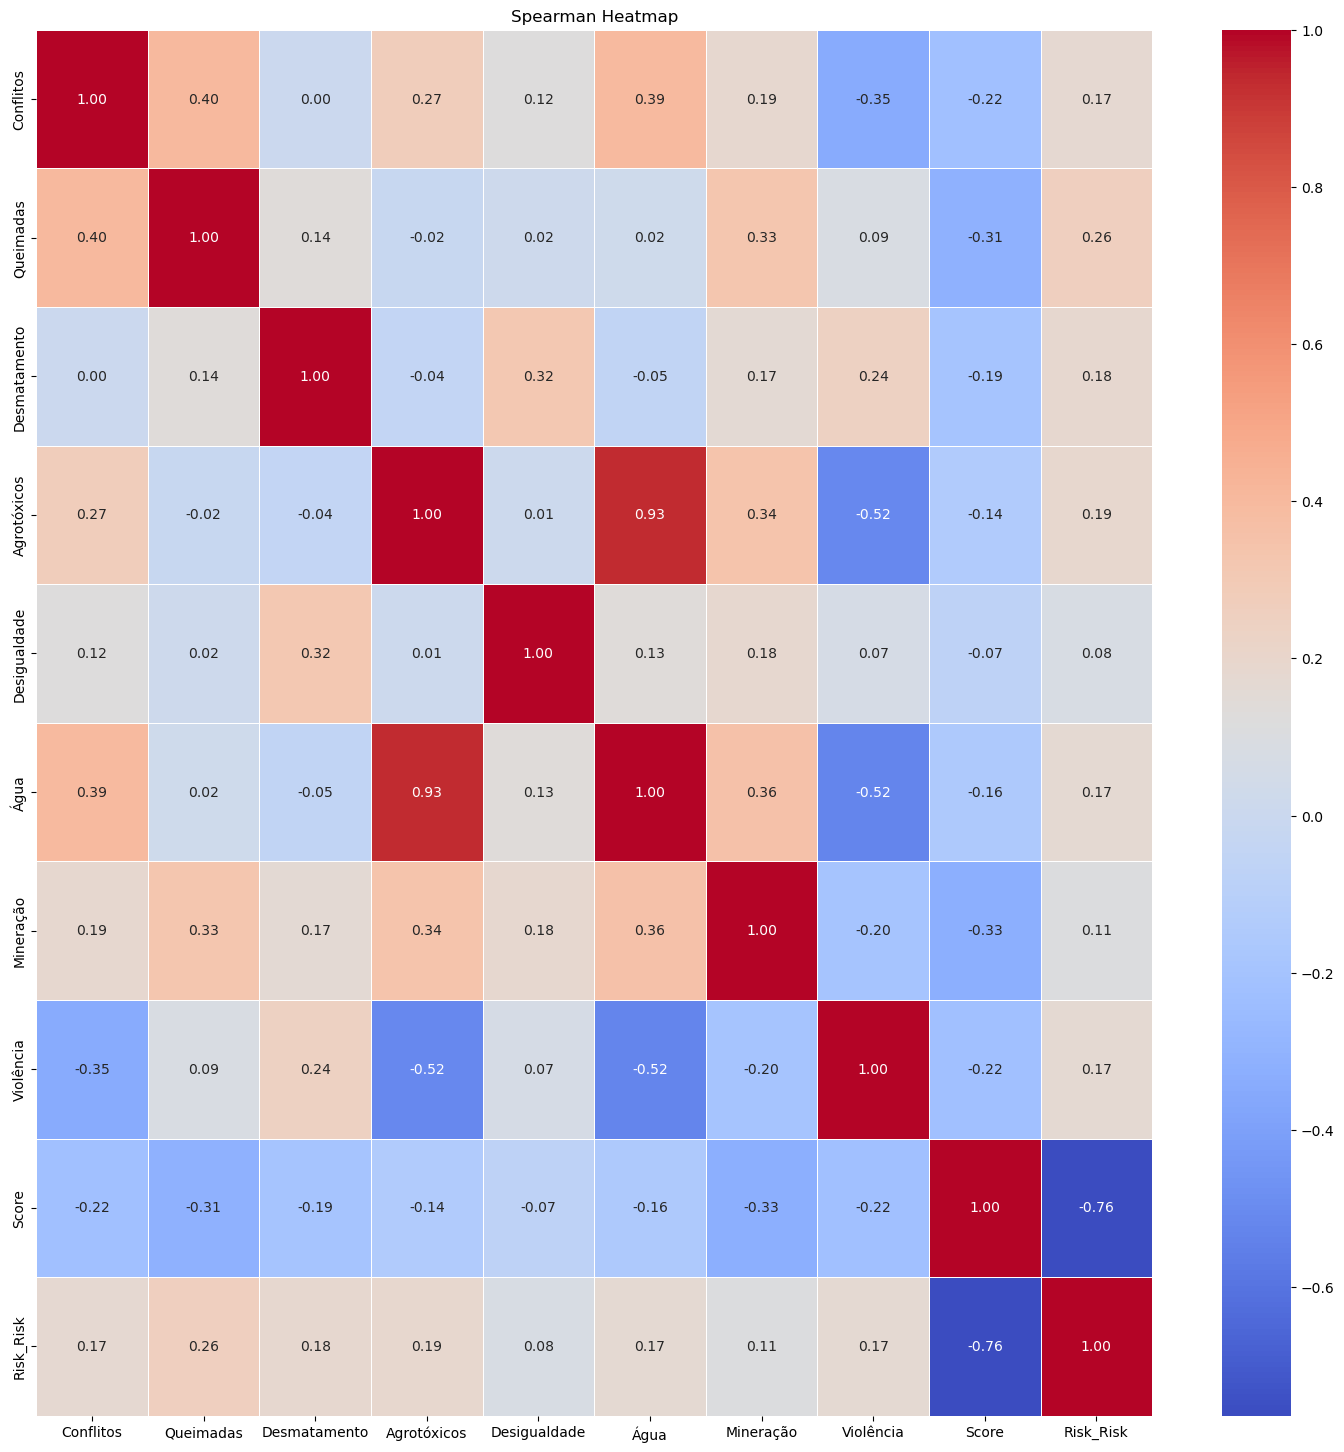

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_data =X_scaled_df.corr(method='pearson')

plt.figure(figsize=(18, 18))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Heatmap')
plt.savefig('spearman_heatmap.png', dpi=300, transparent=True)
plt.show()

In [43]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


X = X_scaled_df.drop(['Risk_Risk', 'Score'], axis=1)  # Exclui a coluna 'Score' e a variável dependente
y = X_scaled_df['Risk_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizando previsões e avaliando o modelo
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.92      1.00      0.96        11

    accuracy                           0.92        13
   macro avg       0.96      0.75      0.81        13
weighted avg       0.93      0.92      0.91        13

[[ 1  1]
 [ 0 11]]


In [44]:
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    
    results[name] = {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": conf_matrix
    }

best_model = max(results, key=lambda k: results[k]['Accuracy'])

print(f"Melhor Modelo: {best_model}")
print(f"Acurácia: {results[best_model]['Accuracy']}")
print(f"Relatório de Classificação:\n{results[best_model]['Classification Report']}")
print(f"Matriz de Confusão:\n{results[best_model]['Confusion Matrix']}")


Melhor Modelo: SVM
Acurácia: 0.8461538461538461
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.85      1.00      0.92        11

    accuracy                           0.85        13
   macro avg       0.42      0.50      0.46        13
weighted avg       0.72      0.85      0.78        13

Matriz de Confusão:
[[ 0  2]
 [ 0 11]]


/home/cleyton/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleyton/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cleyton/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
X_scaled_df.columns

Index(['Conflitos', 'Queimadas', 'Desmatamento', 'Agrotóxicos', 'Desigualdade',
       'Água', 'Mineração', 'Violência', 'Score', 'Risk_Risk'],
      dtype='object')

In [63]:
y =X_scaled_df['Risk_Risk']
X = X_scaled_df[['Violência', ]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

In [64]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Risk_Risk   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.114
Date:                Sat, 27 Jan 2024   Prob (F-statistic):              0.298
Time:                        20:07:08   Log-Likelihood:                -24.224
No. Observations:                  41   AIC:                             52.45
Df Residuals:                      39   BIC:                             55.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7317      0.070     10.459      0.0